# Top 5000 Spotify Data Sci
- @RodrigoLaraG
- 25/07

## Plans/Progress


- EDA
- define major parameters to rank/analyze data
    - `avg_rat`
    - `num_revs`
    - `num_rat`
- **Correlation c/ Music Descriptors**
- develop a ML algorithm to find/recognize patterns that help albuns be more popular/better reviewed
- 

### Ideas

- in-depth exploration of *1969 to 1975* and *1994 to 1998* periods
- in-depth exploration of `num_rat_log` < 1 & `avg_rat` > 3,9
- in-depth exploration of top XXX (i.e. top 500/ to p10%) most popular artists

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dfs = pd.read_csv("Top5000.csv")

In [3]:
dfs.head()

,Unnamed: 0,ars_name,rel_date,gens,descs,avg_rat,num_rat,num_revs,album,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,duration_ms,time_signature
0,0,Radiohead,16 June 1997,"Alternative Rock, Art Rock","melancholic, anxious, futuristic, alienation, ...",4.23,"70,382",1531,OK Computer,0.135763,0.288083,0.565917,0.161053,0.159375,-9.102417,0.056308,115.450750,0.291733,268435.500000,4.000000
1,1,Pink Floyd,12 September 1975,"Progressive Rock, Art Rock","melancholic, atmospheric, progressive, male vo...",4.29,"48,662",983,Wish You Were Here,0.602800,0.373600,0.409800,0.363040,0.384940,-12.689400,0.039740,130.018800,0.259040,530512.000000,3.600000
2,2,King Crimson,10 October 1969,"Progressive Rock, Art Rock","fantasy, epic, progressive, philosophical, com...",4.30,"44,943",870,In the Court of the Crimson King,0.297686,0.340625,0.370475,0.327265,0.149138,-14.873125,0.043463,118.920625,0.279400,507644.125000,3.875000
3,3,Radiohead,3 October 2000,"Art Rock, Experimental Rock, Electronic","cold, melancholic, futuristic, atmospheric, an...",4.21,"58,590",734,Kid A,0.123219,0.601294,0.676706,0.000669,0.311412,-7.811941,0.268318,116.045059,0.398206,325379.529412,4.058824
4,4,Kendrick Lamar,15 March 2015,"Conscious Hip Hop, West Coast Hip Hop, Jazz Rap","political, conscious, poetic, protest, concept...",4.27,"44,206",379,To Pimp a Butterfly,0.322889,0.590750,0.707625,0.000011,0.318419,-5.802062,0.294175,103.444563,0.487187,296225.750000,3.812500


In [5]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4402 entries, 0 to 4401
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        4402 non-null   int64  
 1   ars_name          4402 non-null   object 
 2   rel_date          4402 non-null   object 
 3   gens              4402 non-null   object 
 4   descs             4304 non-null   object 
 5   avg_rat           4402 non-null   float64
 6   num_rat           4402 non-null   object 
 7   num_revs          4402 non-null   int64  
 8   album             4402 non-null   object 
 9   acousticness      4402 non-null   float64
 10  danceability      4402 non-null   float64
 11  energy            4402 non-null   float64
 12  instrumentalness  4402 non-null   float64
 13  liveness          4402 non-null   float64
 14  loudness          4402 non-null   float64
 15  speechiness       4402 non-null   float64
 16  tempo             4402 non-null   float64


In [6]:
dfs.describe()

,Unnamed: 0,avg_rat,num_revs,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,duration_ms,time_signature
count,4402.000000,4402.000000,4402.000000,4.402000e+03,4402.000000,4402.000000,4402.000000,4402.000000,4402.000000,4402.000000,4402.000000,4402.000000,4.402000e+03,4402.000000
mean,2200.500000,3.771320,76.538846,3.384089e-01,0.477338,0.575443,0.250817,0.201108,-10.674275,0.087147,119.290332,0.424103,2.849496e+05,3.855067
std,1270.892272,0.100606,112.977848,2.880880e-01,0.158556,0.226569,0.286694,0.096184,5.197312,0.081774,14.933975,0.200978,1.957019e+05,0.226416
min,0.000000,3.520000,0.000000,6.609091e-07,0.074900,0.002360,0.000000,0.032100,-45.267000,0.026200,60.011000,0.000010,3.976500e+04,1.000000
25%,1100.250000,3.700000,16.000000,9.173208e-02,0.369511,0.422866,0.009679,0.138433,-13.054771,0.041927,110.363377,0.272830,1.998519e+05,3.769231
50%,2200.500000,3.750000,39.000000,2.613944e-01,0.473867,0.598767,0.126991,0.179018,-9.590507,0.055399,119.175856,0.424937,2.432006e+05,3.916667
75%,3300.750000,3.810000,91.000000,5.439500e-01,0.584472,0.746233,0.423197,0.238470,-7.031358,0.094167,128.042923,0.577492,3.071986e+05,4.000000
max,4401.000000,4.340000,1549.000000,9.960000e-01,0.946000,1.000000,0.993000,0.937000,0.942625,0.944000,197.931000,0.990000,3.876277e+06,5.000000


### Dataset Columns

- **Album Descriptors**
    - `'Unnamed: 0'`: index
    - `'ars_name'`: artist name
    - `'rel_date'`: release date
    - `'gens'`: genres
    - `'descs'`: *descriptions of albuns*
    - `'avg_rat'`: average rating
    - `'num_rat'`: number os ratings
    - `'num_revs'`: number of reviews
    - `'album'`: album name
- **Music Descriptions**
    - `'acousticness'` 
    - `'danceability'`
    - `'energy'`
    - `'instrumentalness'`
    - `'liveness'`
    - `'loudness'`
    - `'speechiness'`
    - `'tempo'`
    - `'valence'`
- **Music Duration**
    - `'duration_ms'`: duration in ms
    - `'time_signature'`: *possibly beats/bar?*


## Data Cleaning/Tidying/Feature Engineering

- **Album Descriptors**
    - `'Unnamed: 0'`: *DROP* [x]
    - `'ars_name'`: -
    - `'rel_date'`
        - to datetype [x]
    - `'gens'`
        - get main
        - get count
        - etc
    - `'descs'`
        - *missing values*
        - get main
        - get count
        - etc
    - `'avg_rat'`
    - `'num_rat'`
        - why object? correct data type [x]
        - make a log transform [x]
    - `'num_revs'`
        - - make a log transform [x]
    - `'album'`: album name
- **Music Descriptions**
        - get data format, etc [x]
    - `'acousticness'` 
    - `'danceability'`
    - `'energy'`
    - `'instrumentalness'`
    - `'liveness'`
    - `'loudness'` [-45, 1]
    - `'speechiness'`
    - `'tempo'` [60, 120]
    - `'valence'`
- **Music Duration**
    - `'duration_ms'`
        - /1000 to get to s [x]
    - `'time_signature'`
        - get meaning of data

In [7]:
# drop index col
dfs.drop(columns=["Unnamed: 0"], inplace=True)

In [8]:
# rel_date to datetime format
dfs.rel_date = pd.to_datetime(dfs.rel_date, infer_datetime_format=True)

In [9]:
# gets data to right type
dfs.num_rat = pd.to_numeric(dfs.num_rat.str.replace(",", ""), downcast="unsigned")

In [10]:
# gets data to seconds instead of millisconds
dfs.duration_ms = dfs.duration_ms*(0.001)
dfs.rename(columns={"duration_ms" : "duration_s"}, inplace=True)

In [69]:
from sklearn.preprocessing import PowerTransformer
log_transformer1 = PowerTransformer()
log_transformer2 = PowerTransformer()

dfs["num_rat_log"] = log_transformer1.fit_transform(np.reshape(dfs.num_rat.values, (-1,1)))
dfs["num_revs_log"] = log_transformer2.fit_transform(np.reshape(dfs.num_revs.values, (-1,1)))

## EDA of Variables

### `'ars_name'`

In [12]:
dfs.ars_name.value_counts().head(25)

Various Artists      18
Miles Davis          17
Tom Waits            13
John Coltrane        12
John Williams        12
Bob Dylan            11
The Beatles           9
Iron Maiden           8
Opeth                 8
The Fall              8
Swans                 8
Sonny Rollins         8
McCoy Tyner           8
Thelonious Monk       8
Pink Floyd            8
Herbie Hancock        8
Muddy Waters          8
PJ Harvey             7
Radiohead             7
Bruce Springsteen     7
King Crimson          7
Kanye West            7
Sonic Youth           7
Charles Mingus        7
Johnny Cash           7
Name: ars_name, dtype: int64

In [54]:
artists = dfs.groupby(["ars_name"])

#### Top `artists`

In [68]:
# best rated artists on avg
artists.mean().sort_values("avg_rat", ascending=False).head(15)

,avg_rat,num_rat,num_revs,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,duration_s,time_signature
ars_name,,,,,,,,,,,,,,
Mingus,4.340000,20251.0,365.000000,0.185575,0.261750,0.544750,0.040477,0.125425,-8.778750,0.045025,121.647000,0.296500,591.406750,3.750000
The Velvet Underground & Nico,4.230000,45570.0,929.000000,0.267295,0.428545,0.548818,0.329939,0.098436,-11.624364,0.054445,117.923818,0.450909,267.008364,3.818182
Wu-Tang Clan,4.190000,27579.0,425.000000,0.298220,0.802867,0.513600,0.001657,0.342080,-10.751400,0.415000,101.478333,0.546533,283.678333,3.800000
Slint,4.150000,32954.0,452.000000,0.228972,0.393333,0.286750,0.613167,0.092833,-21.676500,0.039200,148.245500,0.157750,395.655500,3.666667
Television,4.130000,25789.0,391.000000,0.054370,0.529250,0.573375,0.178737,0.152537,-11.092875,0.036387,122.537125,0.683625,342.348500,4.000000
Godspeed You Black Emperor!,4.120000,26700.0,361.000000,0.653000,0.217000,0.197300,0.578333,0.114567,-15.982333,0.051067,94.561000,0.039900,1269.542333,4.000000
Genius/GZA,4.110000,17308.0,329.000000,0.176488,0.704846,0.687769,0.004943,0.311462,-7.757462,0.253908,98.730846,0.469415,255.609923,4.000000
DJ Shadow,4.110000,26775.0,410.000000,0.559550,0.531062,0.622812,0.696500,0.218156,-10.118000,0.140013,108.203688,0.528844,236.480875,3.625000
Milton Nascimento & Lô Borges,4.100000,8084.0,88.000000,0.422219,0.480333,0.402190,0.047278,0.190871,-13.189905,0.040657,113.532238,0.474314,183.988571,3.904762


In [67]:
# artists w/ largest mean rating of albuns
artists.mean().sort_values("num_rat", ascending=False).head(15)

,avg_rat,num_rat,num_revs,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,duration_s,time_signature
ars_name,,,,,,,,,,,,,,
Radiohead,3.970000,46437.857143,732.142857,0.338835,0.429777,0.557356,0.310087,0.176043,-9.351707,0.078485,119.527555,0.319423,266.045982,3.847086
The Velvet Underground & Nico,4.230000,45570.000000,929.000000,0.267295,0.428545,0.548818,0.329939,0.098436,-11.624364,0.054445,117.923818,0.450909,267.008364,3.818182
Nirvana,3.945000,38258.000000,765.500000,0.226551,0.520926,0.605829,0.168715,0.139392,-11.030876,0.069934,127.727703,0.425814,219.002850,3.928571
Kanye West,3.804286,34580.428571,323.714286,0.225165,0.580862,0.599254,0.028394,0.262195,-7.097086,0.230395,112.419354,0.456031,238.255363,3.902407
Joy Division,4.100000,34311.000000,565.500000,0.227952,0.556136,0.662545,0.184434,0.275020,-6.577727,0.052811,107.304295,0.453316,237.104045,3.977273
Pink Floyd,3.935000,33985.250000,734.500000,0.444330,0.406847,0.487811,0.328439,0.220434,-12.000017,0.046373,122.973662,0.376405,354.286500,3.830569
Slint,4.150000,32954.000000,452.000000,0.228972,0.393333,0.286750,0.613167,0.092833,-21.676500,0.039200,148.245500,0.157750,395.655500,3.666667
My Bloody Valentine,3.910000,32695.000000,726.000000,0.153178,0.452274,0.670874,0.397777,0.208962,-9.457864,0.084472,116.358353,0.382398,228.802731,3.856643
Neutral Milk Hotel,3.845000,30389.500000,558.000000,0.267090,0.256918,0.496726,0.310469,0.264258,-9.800830,0.048146,127.266152,0.207144,229.033720,3.776515


In [66]:
# artists w/ largest amount of retings
artists.sum().sort_values("num_rat", ascending=False).head(15)

,avg_rat,num_rat,num_revs,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,duration_s,time_signature
ars_name,,,,,,,,,,,,,,
Radiohead,27.79,325065,5125,2.371845,3.008440,3.901492,2.170609,1.232300,-65.461952,0.549392,836.692887,2.235961,1862.321877,26.929603
Pink Floyd,31.48,271882,5876,3.554637,3.254777,3.902489,2.627509,1.763475,-96.000135,0.370987,983.789295,3.011240,2834.292002,30.644555
The Beatles,35.91,271063,6334,2.582369,4.781177,4.723143,0.454739,1.940293,-88.724933,0.604417,1100.812975,5.320995,1719.766129,34.847425
Kanye West,26.63,242063,2266,1.576154,4.066036,4.194781,0.198755,1.835364,-49.679604,1.612765,786.935475,3.192219,1667.787540,27.316850
David Bowie,28.11,170487,2944,2.000032,3.942050,4.080689,0.465938,1.072435,-72.419118,0.505628,844.183291,3.705050,1732.990471,27.613054
Led Zeppelin,23.66,151243,3442,1.796796,2.543834,3.945966,1.002378,1.160006,-62.477882,0.291572,677.391080,2.967484,1787.947886,22.734091
Kendrick Lamar,19.25,151165,1119,1.475357,3.060802,3.236080,0.007402,1.505144,-40.455869,1.451635,591.913228,2.258905,1331.699365,19.679657
Bob Dylan,43.19,147597,3349,5.971914,5.812229,5.256798,0.156045,1.744893,-124.130472,0.465474,1370.073826,5.999350,3005.354188,42.148318
Miles Davis,66.34,129004,2221,9.063089,7.896982,6.625397,4.226246,3.565370,-242.148946,0.966365,1956.353609,6.708844,7957.783721,64.831905


In [64]:
# artists w/ largest mean number of reviews albuns
artists.mean().sort_values("num_revs", ascending=False).head(15)

,avg_rat,num_rat,num_revs,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,duration_s,time_signature
ars_name,,,,,,,,,,,,,,
The Velvet Underground & Nico,4.230000,45570.000000,929.000000,0.267295,0.428545,0.548818,0.329939,0.098436,-11.624364,0.054445,117.923818,0.450909,267.008364,3.818182
Nirvana,3.945000,38258.000000,765.500000,0.226551,0.520926,0.605829,0.168715,0.139392,-11.030876,0.069934,127.727703,0.425814,219.002850,3.928571
Pink Floyd,3.935000,33985.250000,734.500000,0.444330,0.406847,0.487811,0.328439,0.220434,-12.000017,0.046373,122.973662,0.376405,354.286500,3.830569
Radiohead,3.970000,46437.857143,732.142857,0.338835,0.429777,0.557356,0.310087,0.176043,-9.351707,0.078485,119.527555,0.319423,266.045982,3.847086
My Bloody Valentine,3.910000,32695.000000,726.000000,0.153178,0.452274,0.670874,0.397777,0.208962,-9.457864,0.084472,116.358353,0.382398,228.802731,3.856643
The Beatles,3.990000,30118.111111,703.777778,0.286930,0.531242,0.524794,0.050527,0.215588,-9.858326,0.067157,122.312553,0.591222,191.085125,3.871936
Guns n' Roses,3.520000,16526.000000,614.000000,0.051042,0.396000,0.982250,0.071350,0.240842,-5.354667,0.092483,129.642750,0.347417,268.846583,4.000000
Sex Pistols,3.570000,16117.000000,593.000000,0.034128,0.279417,0.947417,0.061850,0.227517,-5.078250,0.118683,145.910750,0.387167,194.667667,4.000000
Led Zeppelin,3.943333,25207.166667,573.666667,0.299466,0.423972,0.657661,0.167063,0.193334,-10.412980,0.048595,112.898513,0.494581,297.991314,3.789015


In [65]:
# artists w/ largest amount of reviews
artists.sum().sort_values("num_revs", ascending=False).head(15)

,avg_rat,num_rat,num_revs,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,duration_s,time_signature
ars_name,,,,,,,,,,,,,,
The Beatles,35.91,271063,6334,2.582369,4.781177,4.723143,0.454739,1.940293,-88.724933,0.604417,1100.812975,5.320995,1719.766129,34.847425
Pink Floyd,31.48,271882,5876,3.554637,3.254777,3.902489,2.627509,1.763475,-96.000135,0.370987,983.789295,3.011240,2834.292002,30.644555
Radiohead,27.79,325065,5125,2.371845,3.008440,3.901492,2.170609,1.232300,-65.461952,0.549392,836.692887,2.235961,1862.321877,26.929603
Led Zeppelin,23.66,151243,3442,1.796796,2.543834,3.945966,1.002378,1.160006,-62.477882,0.291572,677.391080,2.967484,1787.947886,22.734091
Bob Dylan,43.19,147597,3349,5.971914,5.812229,5.256798,0.156045,1.744893,-124.130472,0.465474,1370.073826,5.999350,3005.354188,42.148318
David Bowie,28.11,170487,2944,2.000032,3.942050,4.080689,0.465938,1.072435,-72.419118,0.505628,844.183291,3.705050,1732.990471,27.613054
Black Sabbath,27.68,128519,2565,1.637047,3.009892,3.931917,0.946179,1.228597,-77.829929,0.407649,880.957506,3.197743,1992.257375,27.336111
King Crimson,27.62,127289,2317,1.052819,3.150453,3.647285,1.882130,1.551701,-83.038530,0.411502,912.159002,2.565408,2293.058698,27.666234
Iron Maiden,30.80,98518,2306,0.452589,2.910069,7.048467,0.633531,1.997232,-41.434658,0.695018,1028.905581,3.111856,2584.905206,30.913889


In [63]:
artists.count().sort_values("num_revs", ascending=False).head(10)

,rel_date,gens,descs,avg_rat,num_rat,num_revs,album,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,duration_s,time_signature
ars_name,,,,,,,,,,,,,,,,,,
Various Artists,18,18,16,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18
Miles Davis,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17
Tom Waits,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13
John Williams,12,12,10,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12
John Coltrane,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12
Bob Dylan,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11
The Beatles,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9
Pink Floyd,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8
Opeth,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8


### `'rel_date'`

In [13]:
dfs.rel_date.dt.year.value_counts().head(20)

1971    143
1973    141
1972    132
1970    124
1974    120
1969    119
1994    116
1995    106
1996    105
1975    104
1997    102
1998    101
2001     97
2002     95
2003     95
1977     92
1999     92
2005     91
1992     91
2000     89
Name: rel_date, dtype: int64

- dois periodos se destacam:
    - entre *1969* e *1975*
    - entre *1994* e *1998*

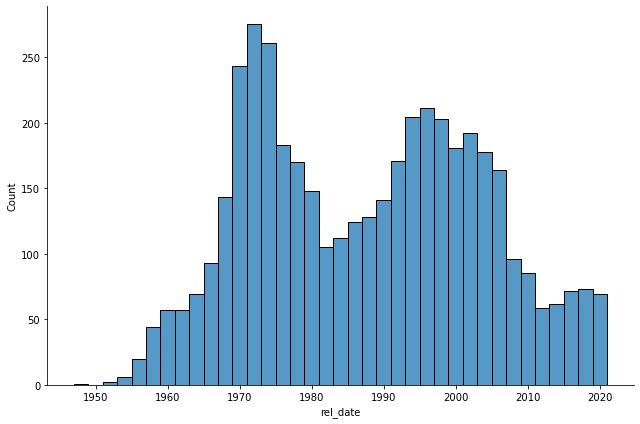

In [14]:
sns.displot(dfs.rel_date.dt.year, height=6, aspect= 1.5, binwidth = 2)

### `'gens'`

In [15]:
# GET MAIN
# GET VALUES COUNT
# EDA

### `'descs'`

In [16]:
# GET MAIN
# GET VALUES COUNT
# EDA

### `'avg_rat'`

In [17]:
temp = dfs.avg_rat

In [18]:
temp.describe()

count    4402.000000
mean        3.771320
std         0.100606
min         3.520000
25%         3.700000
50%         3.750000
75%         3.810000
max         4.340000
Name: avg_rat, dtype: float64

<Figure size 864x576 with 0 Axes>

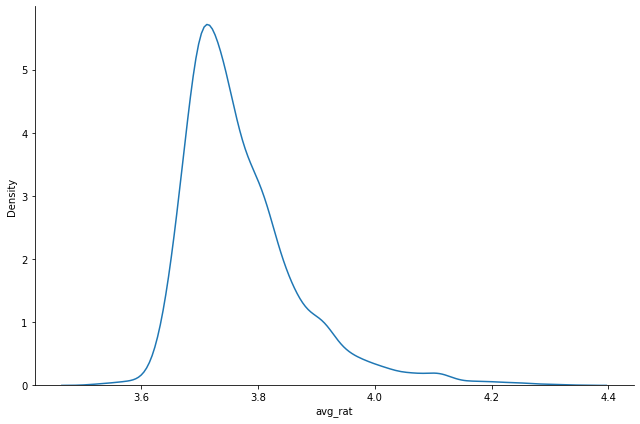

In [19]:
plt.figure(figsize=(12,8))
sns.displot(temp,  height=6, aspect= 1.5, kind = "kde")
#plt.xlim((0, 5))
#plt.ylim((0, 600))

<AxesSubplot:xlabel='avg_rat', ylabel='num_rat_log'>

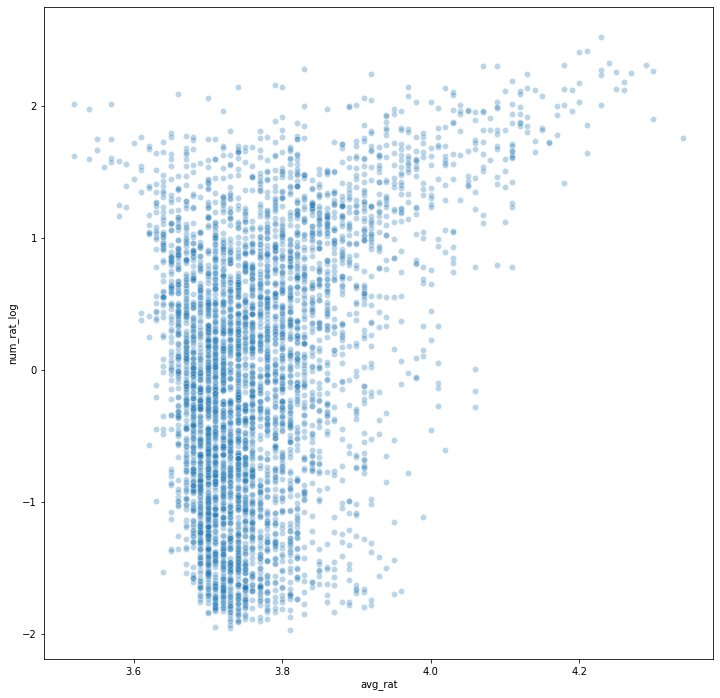

In [75]:
plt.figure(figsize = (12,12))
sns.scatterplot(data = dfs, x = "avg_rat", y = "num_rat_log", alpha= 0.3)

- quando `num_rat_log` é > 1, percebemos que a `avg_rat` começa a crescer igualmente
- enquanto `num_rat_log` é < 1, `avg_rat` fica entre **3,65** e **3,85**
- outro comportamento interessante é que os albuns pior avaliados também estão entre os mais populares

<AxesSubplot:xlabel='avg_rat', ylabel='num_revs_log'>

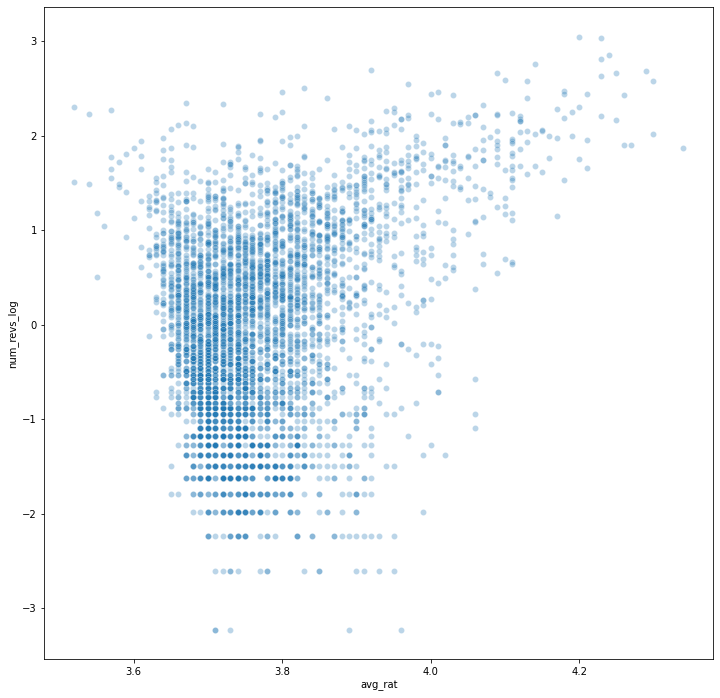

In [76]:
plt.figure(figsize = (12,12))
sns.scatterplot(data = dfs, x = "avg_rat", y = "num_revs_log", alpha= 0.3)

- a correlação entre `avg_rat` e `num_revs_log` é similar à anterior ( X `num_rat_log` ), no entanto sofre c/ o agrupamento p/ instâncias com poucos reviews (< 10)

<AxesSubplot:xlabel='num_rat_log', ylabel='num_revs_log'>

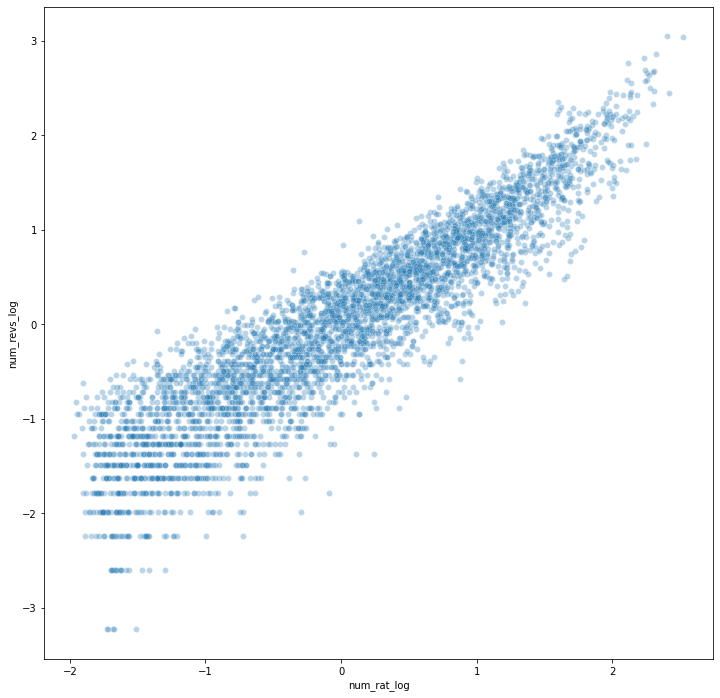

In [77]:
plt.figure(figsize = (12,12))
sns.scatterplot(data = dfs, x = "num_rat_log", y = "num_revs_log", alpha= 0.3)

existe uma correlação linear entre `num_rat_log` e `num_revs_log`, que se torna menos linear com a redução na quantidade

### `'num_rat'`


In [20]:
temp = dfs.num_rat

In [21]:
temp.describe()

count     4402.000000
mean      4346.915720
std       6228.544443
min        260.000000
25%        818.250000
50%       2002.500000
75%       5156.500000
max      70382.000000
Name: num_rat, dtype: float64

(0.0, 600.0)

<Figure size 864x576 with 0 Axes>

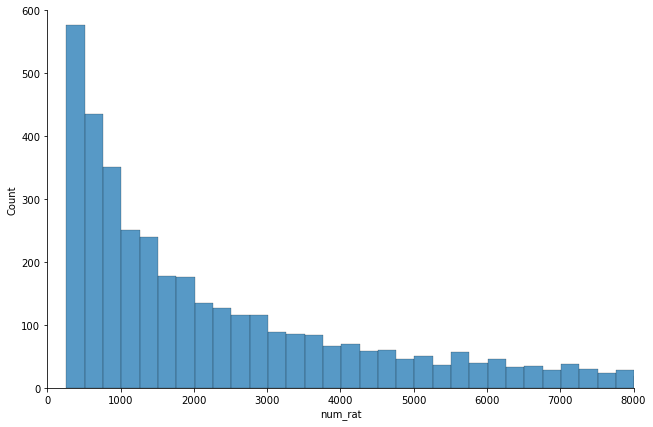

In [22]:
plt.figure(figsize=(12,8))
sns.displot(temp, binwidth = 250, height=6, aspect= 1.5)
plt.xlim((0, 8000))
plt.ylim((0, 600))

<Figure size 864x576 with 0 Axes>

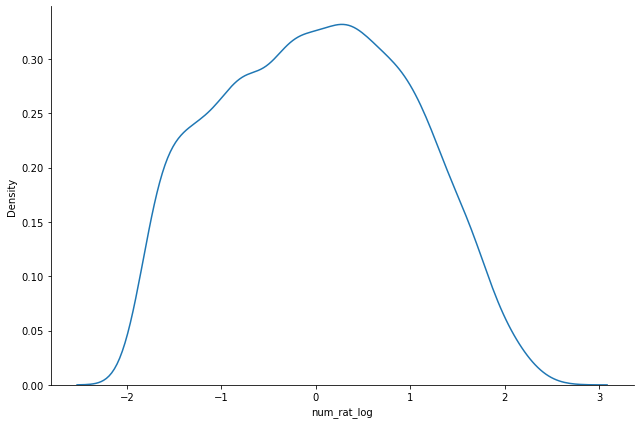

In [73]:
temp = dfs.num_rat_log
plt.figure(figsize=(12,8))
sns.displot(temp, kind = "kde",height=6, aspect= 1.5)
# plt.xlim((0, 8000))
# plt.ylim((0, 600))

### `'num_revs'`

In [23]:
temp = dfs.num_revs

In [24]:
temp.describe()

count    4402.000000
mean       76.538846
std       112.977848
min         0.000000
25%        16.000000
50%        39.000000
75%        91.000000
max      1549.000000
Name: num_revs, dtype: float64

(0.0, 800.0)

<Figure size 864x576 with 0 Axes>

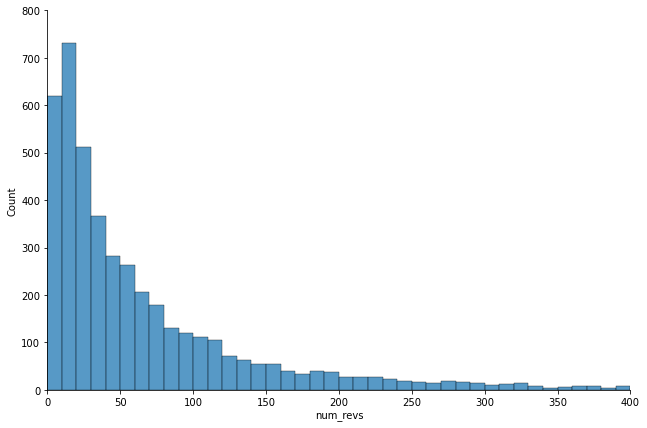

In [25]:
plt.figure(figsize=(12,8))
sns.displot(temp, binwidth = 10, height=6, aspect= 1.5)
plt.xlim((0, 400))
plt.ylim((0, 800))

<Figure size 864x576 with 0 Axes>

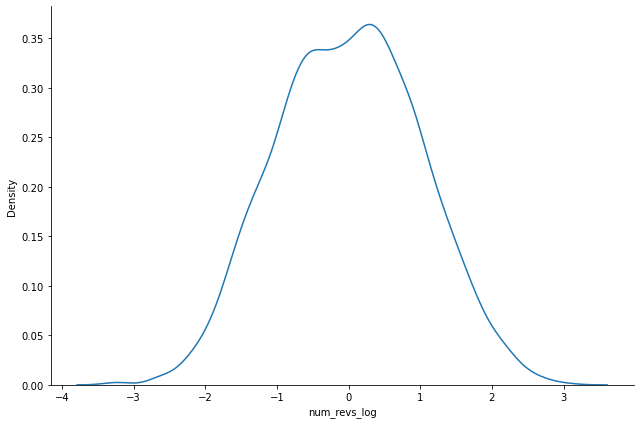

In [72]:
temp = dfs.num_revs_log
plt.figure(figsize=(12,8))
sns.displot(temp, kind = "kde", height=6, aspect= 1.5)
# plt.xlim((0, 8000))
# plt.ylim((0, 600))

In [93]:
dfs.num_revs_log.describe()

count    4.402000e+03
mean    -5.449979e-16
std      1.000114e+00
min     -3.228123e+00
25%     -7.176436e-01
50%      1.782814e-02
75%      7.238629e-01
max      3.047116e+00
Name: num_revs_log, dtype: float64

`num_revs_log` < -1 tem agrupamento
- fazer inverse transform p/ identificar o número real

In [ ]:
log_transformer2.inverse_transform(np.reshape(
    dfs.num_revs_log[dfs.num_revs_log < -1].value_counts().index, (-1,1)))

array([[ 8.],
       [ 6.],
       [ 9.],
       [ 5.],
       [ 7.],
       [10.],
       [ 4.],
       [11.],
       [ 3.],
       [ 2.],
       [ 1.],
       [ 0.]])

### ~~'album'~~ 
- *unique_id*


### `'acousticness'`

*A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.*


In [107]:
temp = "acousticness"

<Figure size 864x576 with 0 Axes>

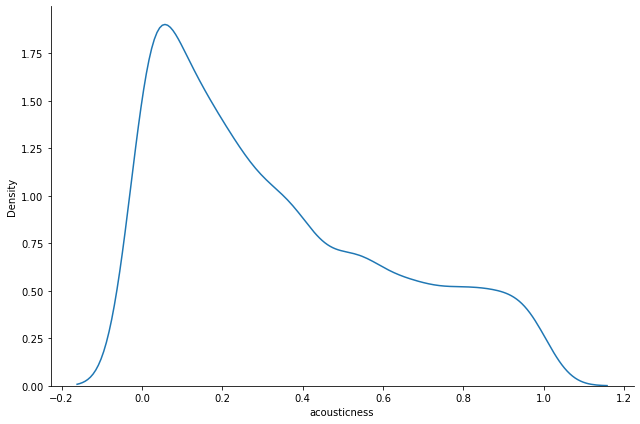

In [108]:
plt.figure(figsize=(12,8))
sns.displot(dfs[temp], kind = "kde", height=6, aspect= 1.5)
# plt.xlim((0, 400))
# plt.ylim((0, 800))

<AxesSubplot:xlabel='avg_rat', ylabel='acousticness'>

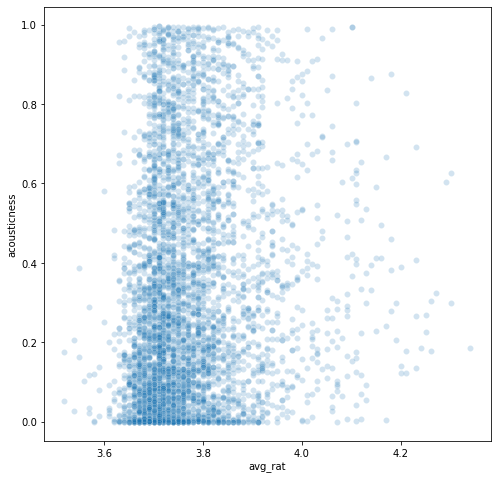

In [109]:
plt.figure(figsize = (8,8))
sns.scatterplot(data = dfs, x = "avg_rat", y = temp, alpha= 0.2)

### `'danceability'`

*Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.*

In [118]:
temp = "danceability"

<Figure size 864x576 with 0 Axes>

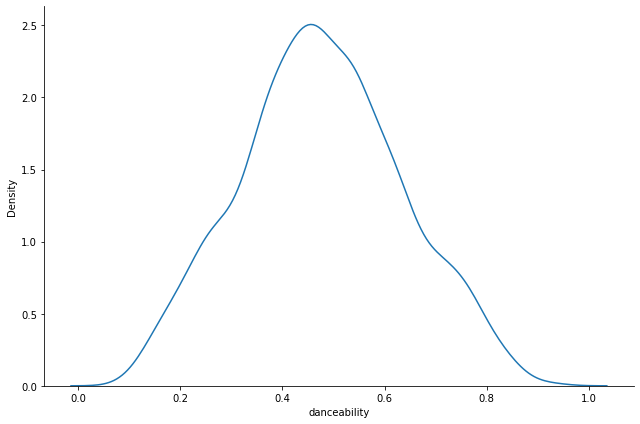

In [119]:
plt.figure(figsize=(12,8))
sns.displot(dfs[temp], kind = "kde", height=6, aspect= 1.5)
# plt.xlim((0, 400))
# plt.ylim((0, 800))

<AxesSubplot:xlabel='avg_rat', ylabel='danceability'>

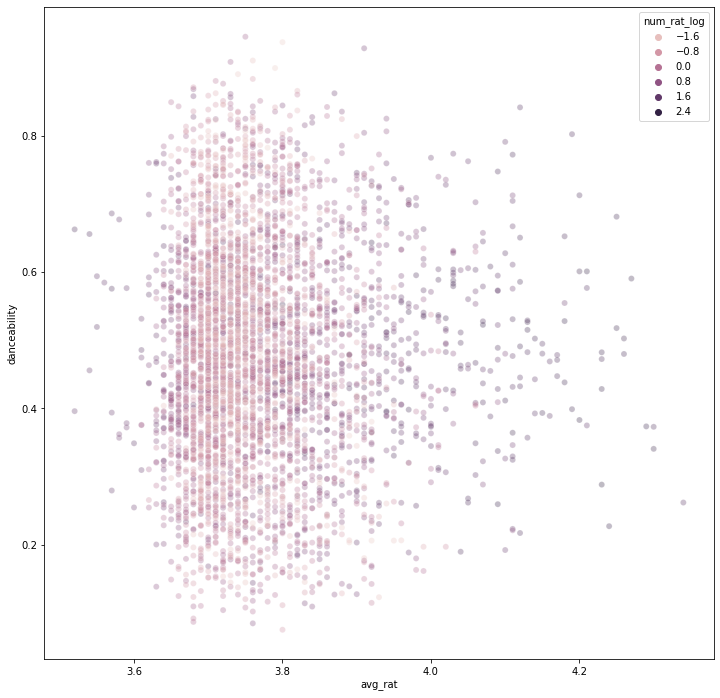

In [126]:
plt.figure(figsize = (12,12))
sns.scatterplot(data = dfs, x = "avg_rat", y = temp, alpha= 0.3, hue = "num_rat_log")

### `'energy'`

*Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.*

In [110]:
temp = "energy"

<Figure size 864x576 with 0 Axes>

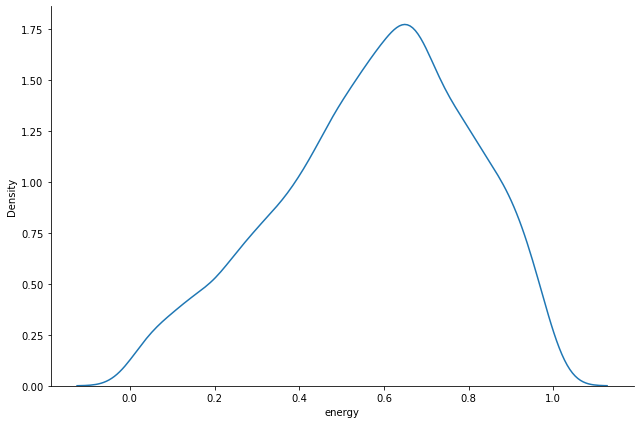

In [111]:
plt.figure(figsize=(12,8))
sns.displot(dfs[temp], kind = "kde", height=6, aspect= 1.5)
# plt.xlim((0, 400))
# plt.ylim((0, 800))

<AxesSubplot:xlabel='avg_rat', ylabel='energy'>

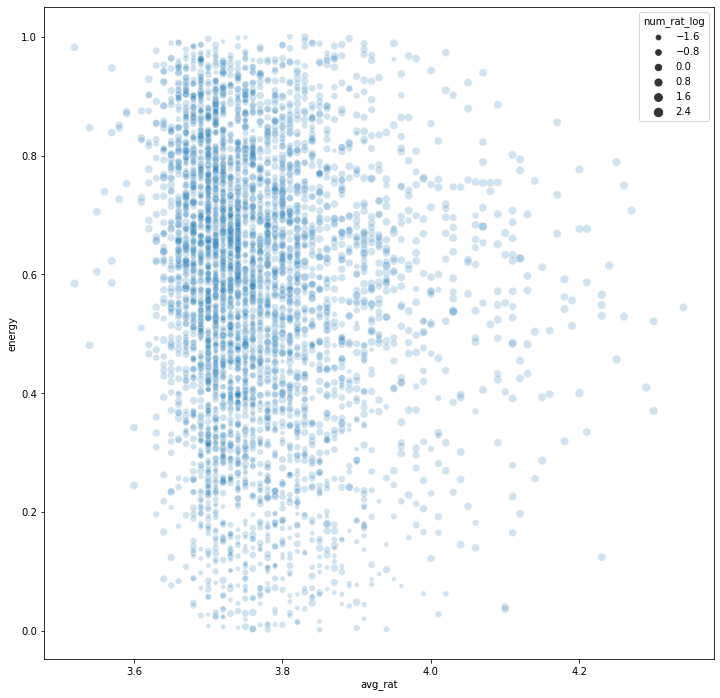

In [117]:
plt.figure(figsize = (12,12))
sns.scatterplot(data = dfs, x = "avg_rat", y = temp, alpha= 0.2, size = "num_rat_log")

### `'instrumentalness'`

*Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.*

In [32]:
temp = dfs.instrumentalness

<Figure size 864x576 with 0 Axes>

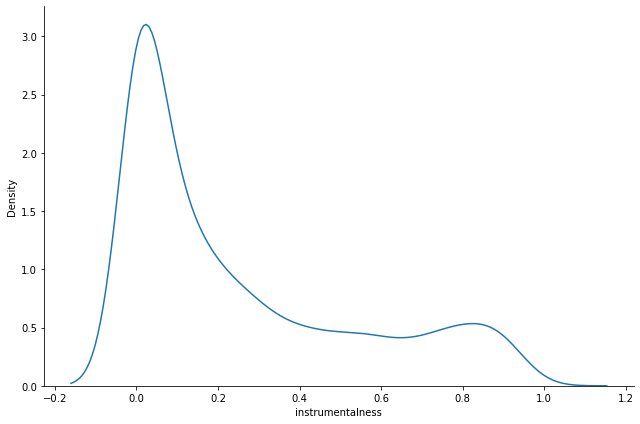

In [33]:
plt.figure(figsize=(12,8))
sns.displot(temp, kind = "kde", height=6, aspect= 1.5)
# plt.xlim((0, 400))
# plt.ylim((0, 800))

### `'liveness'`

*Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.*

In [34]:
temp = dfs.liveness

<Figure size 864x576 with 0 Axes>

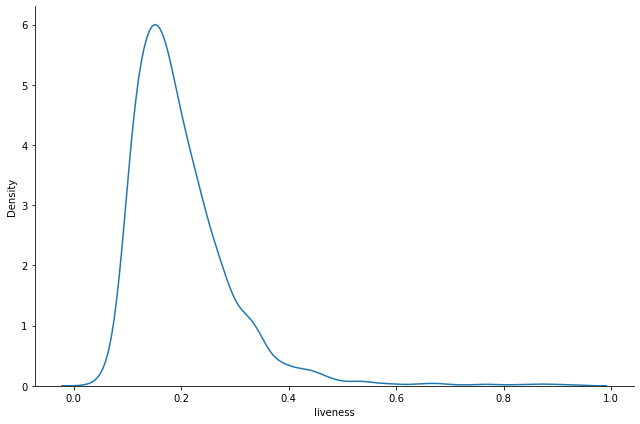

In [35]:
plt.figure(figsize=(12,8))
sns.displot(temp, kind = "kde", height=6, aspect= 1.5)
# plt.xlim((0, 400))
# plt.ylim((0, 800))

### `'loudness'`

*The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db.*

In [36]:
temp = dfs.loudness

<Figure size 864x576 with 0 Axes>

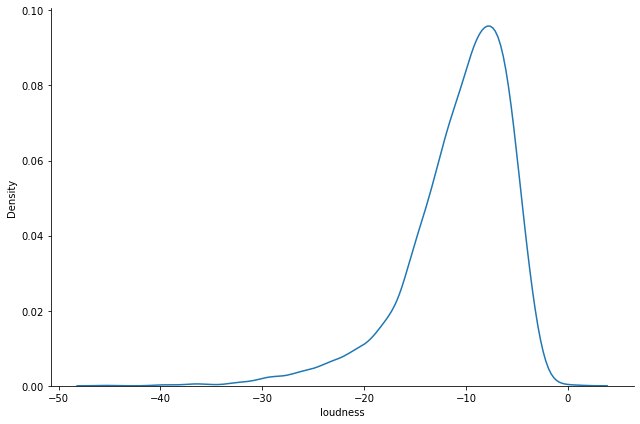

In [37]:
plt.figure(figsize=(12,8))
sns.displot(temp, kind = "kde", height=6, aspect= 1.5)
# plt.xlim((0, 400))
# plt.ylim((0, 800))

### `'speechiness'`

*Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.*

In [38]:
temp = dfs.speechiness

<Figure size 864x576 with 0 Axes>

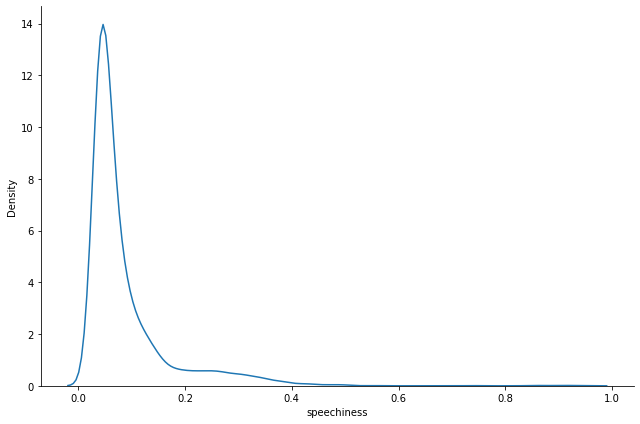

In [39]:
plt.figure(figsize=(12,8))
sns.displot(temp, kind = "kde", height=6, aspect= 1.5)
# plt.xlim((0, 400))
# plt.ylim((0, 800))

### `'tempo'`

*The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.*

In [40]:
temp = dfs.tempo

<Figure size 864x576 with 0 Axes>

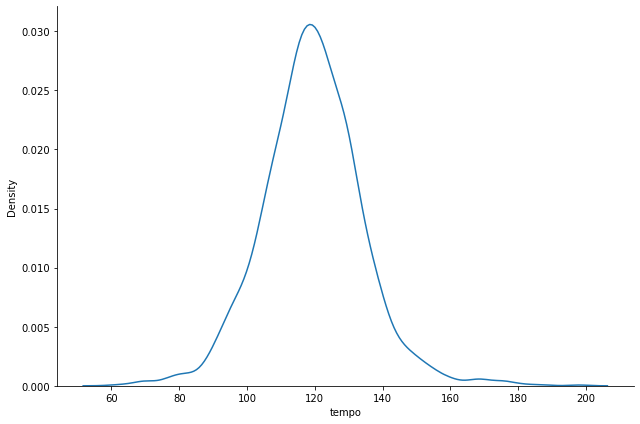

In [41]:
plt.figure(figsize=(12,8))
sns.displot(temp, kind = "kde", height=6, aspect= 1.5)
# plt.xlim((0, 400))
# plt.ylim((0, 800))

### `'valence'`

*A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).*

In [42]:
temp = dfs.valence

<Figure size 864x576 with 0 Axes>

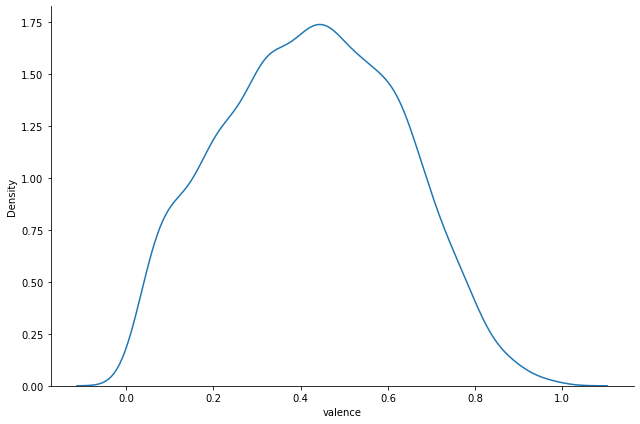

In [43]:
plt.figure(figsize=(12,8))
sns.displot(temp, kind = "kde", height=6, aspect= 1.5)
# plt.xlim((0, 400))
# plt.ylim((0, 800))

### `'duration_s'`


In [44]:
temp = dfs.duration_s

(0.0, 1500.0)

<Figure size 864x576 with 0 Axes>

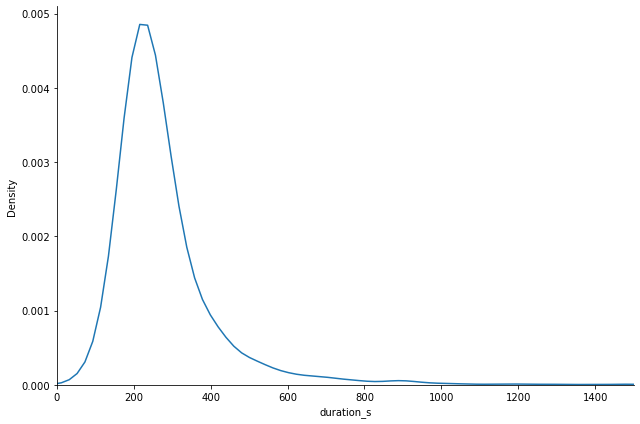

In [45]:
plt.figure(figsize=(12,8))
sns.displot(temp, kind = "kde", height=6, aspect= 1.5)
plt.xlim((0, 1500))
# plt.ylim((0, 800))

### `'time_signature'`

*An estimated time signature. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure). The time signature ranges from 3 to 7 indicating time signatures of "3/4", to "7/4".*

\>= 3  <= 7

#### `time_signature` decoding

One source says its a time signature, that can range from 3 to 7 (as in *3/4* or *7/4* time signature)

The data ranges from 1 to 5, and we can see that some of the data is a fraction o *X/3*, some have a *X.X000* format

From Source: *An estimated overall time signature of a track. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure).* 

https://search.r-project.org/CRAN/refmans/billboard/html/spotify_track_data.html

From Source2: *time_signature*  -  ***integer***

*An estimated time signature. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure). The time signature ranges from 3 to 7 indicating time signatures of "3/4", to "7/4".*

*\>= 3  <= 7*

https://developer.spotify.com/documentation/web-api/reference/#/operations/get-audio-features

In [46]:
dfs.time_signature.value_counts()

4.000000    1581
3.900000     127
3.800000     124
3.750000     115
3.916667     104
            ... 
3.828571       1
3.230769       1
2.454545       1
3.420000       1
3.360000       1
Name: time_signature, Length: 273, dtype: int64

In [47]:
dfs.time_signature.describe()

count    4402.000000
mean        3.855067
std         0.226416
min         1.000000
25%         3.769231
50%         3.916667
75%         4.000000
max         5.000000
Name: time_signature, dtype: float64

(3.0, 4.5)

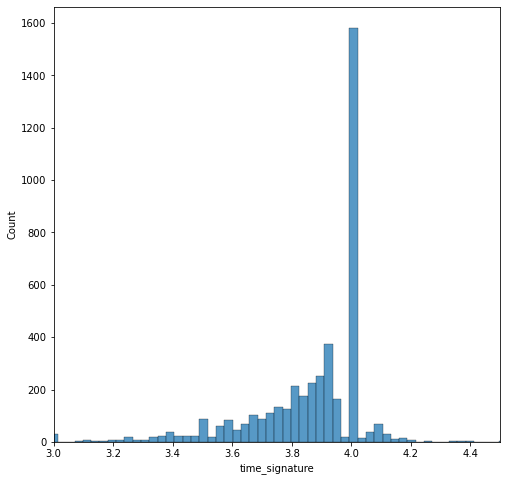

In [48]:
plt.figure(figsize=(8,8))
sns.histplot(data = dfs, x = "time_signature")
plt.xlim((3, 4.5))

(0.0, 450.0)

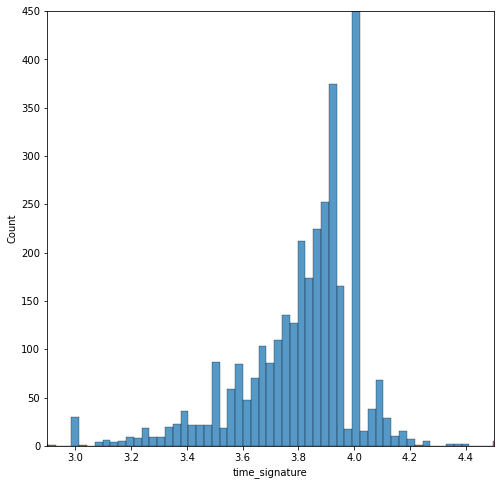

In [49]:
plt.figure(figsize=(8,8))
sns.histplot(data = dfs, x = "time_signature")
plt.xlim((2.9, 4.5))
plt.ylim((0, 450))